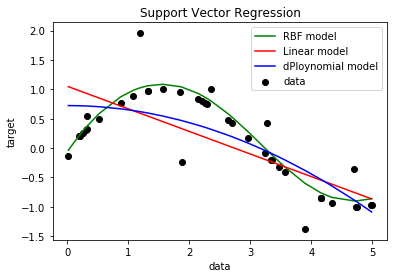

In [60]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import time

#产生数据
X = np.sort(5 * np.random.rand(40,1), axis = 0)

y = np.sin(X).ravel()

y [::5] += 3 * (0.5 - np.random.rand(8))

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)

y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

plt.scatter(X, y, c='k', label='data')
plt.plot(X, y_rbf, c='g', label='RBF model')
plt.plot(X, y_lin, c='r', label='Linear model')
plt.plot(X, y_poly, c='b', label='dPloynomial model')

plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

从回归的角度，可以根据之前的历史数据，预测下一个时间点的股价。

分类的角度，可以根据历史数据，预测下一个时间点股价的正负。

下面对股票数据进行回归建模。

In [61]:
print(y.shape)
print(X.shape)

(40,)
(40, 1)


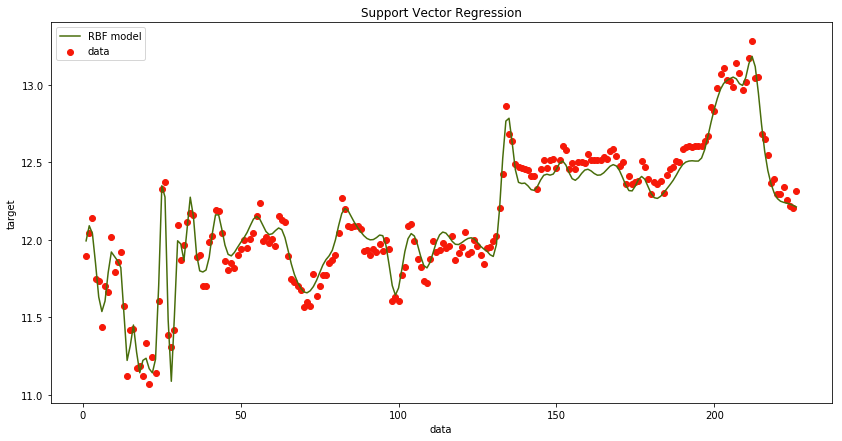

In [69]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import time
import pandas as pd

#start = "20160101"
#end = "20170101"
#code = "600000"
#df = DataAPI.MktEqudAdjAfGet(tricker=code, beginData=start, endDate=end,field=u"tradeDate, closePrice", pandas ="1")
df = pd.read_excel("600000.xls")
df = df[["date", "close"]]
df = df.set_index("date").copy()
df.head()

dates = df.index
X = np.mat(range(1, len(df.values) + 1)).T
y = df.values.ravel()

#拟合回归模型
svr_rbf = SVR(kernel="rbf",C=1e3, gamma=0.1)
y_rbf = svr_rbf.fit(X, y).predict(X)

_, ax = plt.subplots(figsize = [14, 7])

dates = df.index
plt.scatter(X.tolist(), y.tolist(), c="#F61909", label="data")
ax.plot(X, y_rbf, c="#486D0B", label="RBF model")

ticks = ax.get_xticks()
plt.xlabel("data")
plt.ylabel("target")
plt.title("Support Vector Regression")

plt.legend()
plt.show()


## 特征选择
基本面因子：PE，PB，ROE等
技术指标因子：RSI、KDJ、MA、MACD等
蜡烛图形态因子：三乌鸦、锤子线等


## 输出
股价
股价涨跌分类
未来一段时间收益率


## 利用非监督学习甚至深度学习找到特征
比如找到大涨的股票，然后看大涨前一段时间的形态有没有相似的，利用非监督学习的方法。显然，这样的关系可能不是那么明显地存在于股票的价格中，可能存在于收益曲线中或者方差曲线中，甚至更高复杂度的统计量中。深度学习提供了将原数据投影到另一个特征空间中的方法，而且是高度非线性的。那么，原数据中没有体现出来的相关性，会不会在这种高度非线性的投影空间中体现出来呢？这个问题值思考。


SVR (Support Vector Regression)
SVR是SVM(Support Vector Machine)中的一个版本，可以用于解决回归问题。

In [97]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pandas as pd

df = pd.read_excel("600000.xls")
data = df[["open", "close", "high", "low"]]
data.head()

test = np.random.randn(5,5)
print(test)
print(test.mean(), test.std())
test = preprocessing.scale(test)
print(test)
print(test.mean(), test.std())

data = preprocessing.scale(data)
data[31:43]

[[-0.54373025  1.02482877  0.51297016  0.33900593 -0.18474626]
 [ 1.43611827 -0.0323135  -0.6593051   0.52775897  0.47590211]
 [-0.31205589  0.3127961   0.65000347  0.80369874  0.055066  ]
 [-0.53268991  0.71871928 -0.88665588 -0.22697965 -0.64758735]
 [-0.65992325 -1.59225902  2.38088823 -1.38669725  0.24080692]]
0.07254478508095977 0.8619536850541722
[[-0.53504129  1.0284109   0.09739746  0.42206565 -0.44866024]
 [ 1.97947561 -0.13004008 -0.90954007  0.66521084  1.26830006]
 [-0.24080206  0.24814228  0.21510359  1.02066699  0.17458829]
 [-0.52101944  0.69296615 -1.10482529 -0.30701754 -1.65153883]
 [-0.68261281 -1.83947925  1.70186431 -1.80092594  0.65731072]]
4.440892098500626e-18 1.0


array([[-0.48985603, -0.43412266, -0.43309347, -0.44995259],
       [-0.50370948, -0.09375242, -0.02984434, -0.26246519],
       [-0.02345686,  0.04423551,  0.58223022,  0.08449424],
       [ 0.08506176,  0.01203833,  0.13097525,  0.14267999],
       [ 0.00655893, -0.62040637, -0.25547183, -0.40685204],
       [-0.59837465, -0.58820919, -0.64191891, -0.40685204],
       [-0.50370948, -1.03666998, -0.43309347, -0.85509777],
       [-0.89160582, -1.03666998, -0.98036014, -0.85509777],
       [-0.70458437, -0.38812668, -0.51230312, -0.44995259],
       [-0.19431596, -0.29613473, -0.30347768, -0.35082132],
       [-0.19431596,  0.09023149, -0.02984434, -0.50813834],
       [-0.25665645,  0.0741329 ,  0.03496355, -0.29263558]])

拟合与预测
假设i为1，days为30，

X：第i~i+days 天的开盘，收盘，最高，最低数据。

y：第i+1~i+days+1 天（对应的第二天）的开盘价。

X2：第i~i+days+1天的开盘，收盘，最高，最低数据。

yrep：第i+1~i+days+2天（对应的第二天）的预测开盘价。

yreal：第i+1~i+days+2天的开盘价。

yreal2：第i+days+2天的开盘价减第i+days+1天的开盘价。（真实趋势，大于0表示涨了）

yrep2：第i+days+2天的开盘价减第i+days+1天的预测开盘价。（预测趋势，大于0表示涨了）



同号相乘大于零，这里统计的是所有预测趋势的正确数量，预测涨和跌都算在里面了。


t：预测成功次数。



后面的两个if统计的是当预测为涨的时候，实际涨的次数和跌的次数。这个胜率只统计预测涨的成功率。


m：预测上涨，且真实情况上涨的次数。

e：预测上涨，但真实情况下跌的次数。

In [109]:
i = 1
t = 0.0
m = 0.0
e = 0.0
days = 30
predictValue = 0
for i in range(data.shape[0] - days - 1):
    #X = data[i:i+days, :]
    X = data[i:i+days, [0,2,3]]
    y = data[i + 1 : i + days + 1, predictValue]
    svr = SVR(kernel="rbf", C = 1e3, gamma=0.1)
    svr.fit(X, y)
    
    #X2 = data[i:i+days+1, :]
    X2 = data[i:i+days+1, [0,2,3]]
    y_pre = svr.predict(X2)
    y_real = data[i+1: i+ days + 2, predictValue]
    
    y_real2 = y_real[-1] - y_real[-2]
    y_pre2 = y_pre[-1] - y_pre[-2]
    
    if y_real2 * y_pre2 > 0:
        t += 1
        
    if y_pre2 > 0:
        if y_real2 > 0:
            m += 1
        else:
            e += 1
            
print(t/(240-days) * 100)
print(m/(m+e) * 100)

60.0
66.30434782608695


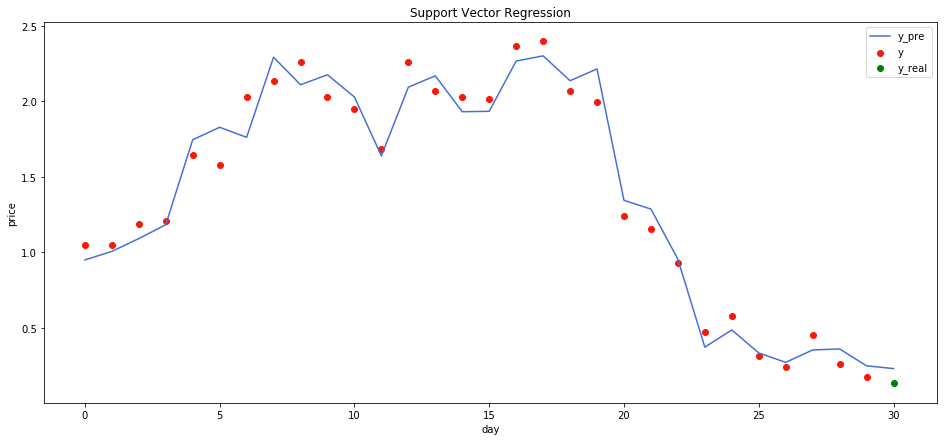

In [110]:
import matplotlib.pyplot as plt
_, ax = plt.subplots(figsize = [16, 7])

plt.scatter(range(days), y, c="#F61909", label="y")
#plt.hold("on")

plt.scatter(range(days, days + 1), y_real[-1], c='g', label='y_real')
#plt.hold("on")

plt.plot(range(days + 1), y_pre, c = "#486DDB", label="y_pre")
plt.xlabel("day")
plt.ylabel("price")
plt.title('Support Vector Regression')
plt.legend()
plt.show()